# Problem 6
In this notebook you can find my solutions of the problem 6 of the Assignment 1.

In [1]:
from pylab import *
from scipy.integrate import *

## Stability
Let us check if the given system is stable or not.

In [2]:
a = np.array([[0, 1], [1/2, 1]]) # matrix A
b = np.array([[0, 0], [3/4, -5/4]])

np.linalg.eig(a)

(array([-0.3660254,  1.3660254]), array([[-0.9390708 , -0.59069049],
        [ 0.34372377, -0.80689822]]))

As you can see the system has one eigenvalue with positive real part. That means the system is not stable.

## ODE solution

This function solves the ODE and draws the plot of it.

In [3]:

def solve_ode(f, init,  t = linspace(0, 5, 1000)):
    # solving the ode
    result = odeint(f, init, t)
    
    x0 = result[:, 0]
    
    # draw a plot
    plot(t,x0,lw=2)
    xlabel('t')
    ylabel('x')
    grid()
    
    return t, x0

Solve the given ODE
$$4x'' - 4x' + 5t -2x = 3, \quad x(0) = -3, x'(0) = 0$$

Let us define the function that represents our ODE. Since pylab does not allow solving equations rather than in standard form.
But x and y can be vectors, so we can easily solve it in vector form.

In [4]:
# define the ODE function
def f(x, t):
    x0, x1 = x
    return [x1, x1 - 5/4 * t + 1/2 * x0 + 3/4]

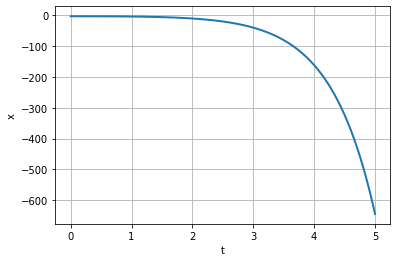

In [5]:
init = [-3, 0]
ode = solve_ode(f, init)

## State Space solver

This function gets two matrices as input, solve the given SS and draws its plot.

In [6]:
def ss_solve(A, B, f, init):
    t = linspace(0, 5, 1000)
    
    # solving the ode
    result = odeint(f, init, t)
    x0 = result[:, 0]

    # draw a plot
    plot(t,x0,lw=2)
    xlabel('t')
    ylabel('x')
    grid()
    return (t, x0)

In [7]:
def f_ss(x, t):
    x = np.reshape(x, (2, -1))
    return ((a.dot(x)) + b.dot([[1], [t]])).T.tolist()[0]

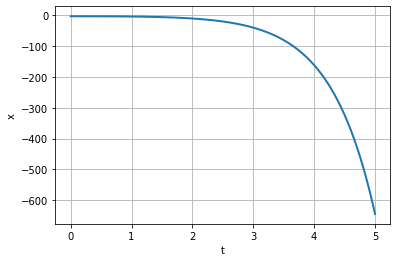

In [8]:
ss = ss_solve(a, b, f_ss, [-3, 0]) # this is the same graph

Text(0, 0.5, 'x(t)')

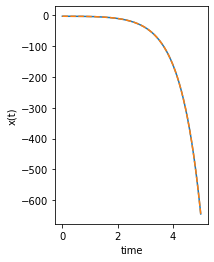

In [9]:
import matplotlib.pyplot as plt
# ode based model
plt.subplot(121)
plt.plot(*ode)
plt.plot(*ss, '--')
plt.xlabel('time')
plt.ylabel('x(t)')

As you can see the solutions are the same.